# Contents
This file contains the following steps:
1. Data importing from SQL server
2. Data cleaning using Pandas and Missingno 
3. Data manipulation using Numpy
4. Data plotting using Plotly, Matplotlib and Seaborn


In [37]:
# Importing all the necessary Libraries
import pandas as pd
import psycopg2
import numpy as nm
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [38]:
# Establishing the necessary requirements to connect to the SQL Server
import os
from dotenv import load_dotenv

load_dotenv()

DATABASE = os.getenv('DATABASE')
USER_DB = os.getenv('USER_DB')
PASSWORD = os.getenv('PASSWORD')
HOST = os.getenv('HOST')
PORT = os.getenv('PORT')

In [39]:
# Connecting to the SQL server to retrive the data
conn = psycopg2.connect(
    database=DATABASE,
    user=USER_DB,
    password=PASSWORD,
    host=HOST,
    port=PORT
)

In [40]:
# Import the data into a pandas dataframe
query_string = """
                SET SCHEMA 'eda';
                SELECT kchd.*,kchs."date" ,kchs.price 
                FROM king_county_house_details kchd 
                LEFT JOIN king_county_house_sales kchs 
                ON kchd.id = kchs.house_id;
"""
df_psycopg = pd.read_sql(query_string, conn)

/var/folders/xb/m05hsg413ms7q3z1ggy41mh00000gn/T/ipykernel_3596/2983765900.py:9: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [41]:
# Close the connection
conn.close()

In [42]:
# Check to see if the data is imported properly
df_psycopg.head()

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  7129300520     3.000      1.000     1180.000  5650.000   1.000         NaN   
1  6414100192     3.000      2.250     2570.000  7242.000   2.000       0.000   
2  5631500400     2.000      1.000      770.000 10000.000   1.000       0.000   
3  2487200875     4.000      3.000     1960.000  5000.000   1.000       0.000   
4  1954400510     3.000      2.000     1680.000  8080.000   1.000       0.000   

   view  condition  grade  ...  sqft_basement  yr_built  yr_renovated  \
0 0.000          3      7  ...          0.000      1955         0.000   
1 0.000          3      7  ...        400.000      1951     19910.000   
2 0.000          3      6  ...          0.000      1933           NaN   
3 0.000          5      7  ...        910.000      1965         0.000   
4 0.000          3      8  ...          0.000      1987         0.000   

   zipcode    lat     long  sqft_living15  sqft_lot15        date      price  
0    98178 47.511 -122.257       1340.000    5650.000  2014-10-13 221900.000  
1    98125 47.721 -122.319       1690.000    7639.000  2014-12-09 538000.000  
2    98028 47.738 -122.233       2720.000    8062.000  2015-02-25 180000.000  
3    98136 47.521 -122.393       1360.000    5000.000  2014-12-09 604000.000  
4    98074 47.617 -122.045       1800.000    7503.000  2015-02-18 510000.000  

[5 rows x 21 columns]

In [43]:
# Export the data to a csv-file
df_psycopg.to_csv('data/eda.csv',index=False)

In [44]:
# Import the data from a csv-file
df_import = pd.read_csv('data/eda.csv')
df_import.head()

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  7129300520     3.000      1.000     1180.000  5650.000   1.000         NaN   
1  6414100192     3.000      2.250     2570.000  7242.000   2.000       0.000   
2  5631500400     2.000      1.000      770.000 10000.000   1.000       0.000   
3  2487200875     4.000      3.000     1960.000  5000.000   1.000       0.000   
4  1954400510     3.000      2.000     1680.000  8080.000   1.000       0.000   

   view  condition  grade  ...  sqft_basement  yr_built  yr_renovated  \
0 0.000          3      7  ...          0.000      1955         0.000   
1 0.000          3      7  ...        400.000      1951     19910.000   
2 0.000          3      6  ...          0.000      1933           NaN   
3 0.000          5      7  ...        910.000      1965         0.000   
4 0.000          3      8  ...          0.000      1987         0.000   

   zipcode    lat     long  sqft_living15  sqft_lot15        date      price  
0    98178 47.511 -122.257       1340.000    5650.000  2014-10-13 221900.000  
1    98125 47.721 -122.319       1690.000    7639.000  2014-12-09 538000.000  
2    98028 47.738 -122.233       2720.000    8062.000  2015-02-25 180000.000  
3    98136 47.521 -122.393       1360.000    5000.000  2014-12-09 604000.000  
4    98074 47.617 -122.045       1800.000    7503.000  2015-02-18 510000.000  

[5 rows x 21 columns]

In [45]:
# Step to check the Null values and Data Types of the respective columns
df_import.info()

<class 'pandas.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_lot15     21

In [46]:
# Removing the duplicates if any
df_import.duplicated().value_counts()

False    21597
Name: count, dtype: int64

In [47]:
# Converting the date to DateTime format
df_import['date'] = pd.to_datetime(df_import['date'], format='%Y-%m-%d')
df_import.info()

<class 'pandas.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   bedrooms       21597 non-null  float64       
 2   bathrooms      21597 non-null  float64       
 3   sqft_living    21597 non-null  float64       
 4   sqft_lot       21597 non-null  float64       
 5   floors         21597 non-null  float64       
 6   waterfront     19206 non-null  float64       
 7   view           21534 non-null  float64       
 8   condition      21597 non-null  int64         
 9   grade          21597 non-null  int64         
 10  sqft_above     21597 non-null  float64       
 11  sqft_basement  21145 non-null  float64       
 12  yr_built       21597 non-null  int64         
 13  yr_renovated   17749 non-null  float64       
 14  zipcode        21597 non-null  int64         
 15  lat            21597 non-null 

<Axes: ylabel='Frequency'>

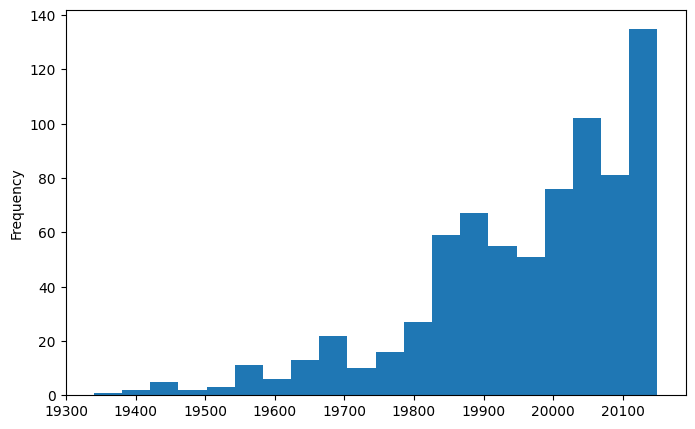

In [48]:
# Checking to see if all the dates in the Renovated Year column are wrong, by using the unique method
df_uniques = df_import['yr_renovated'].unique()
df_import.query('yr_renovated != 0')['yr_renovated'].plot(kind='hist', bins=20)

In [49]:
# Since all the year values are wrong, this step is to convert the data to remove the extra 0.
# Warning! don't use this code multiple times, it will change the year everytime you run it!
df_import ['yr_renovated'] = df_import ['yr_renovated'] / 10

<Axes: ylabel='Frequency'>

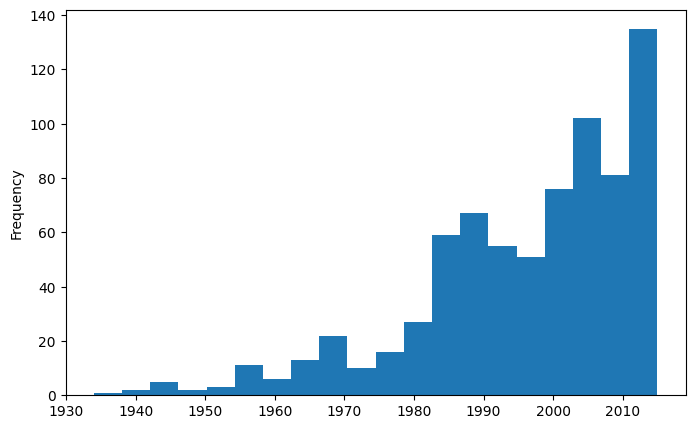

In [50]:
# Replotting the Renovated year histogram to see if the changes are incorporated
df_uniques = df_import['yr_renovated'].unique()
df_import.query('yr_renovated != 0')['yr_renovated'].plot(kind='hist', bins=20)

In [51]:
# Checking to see how many values are missing in each column
df_import.isna().sum()

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
dtype: int64

<Axes: >

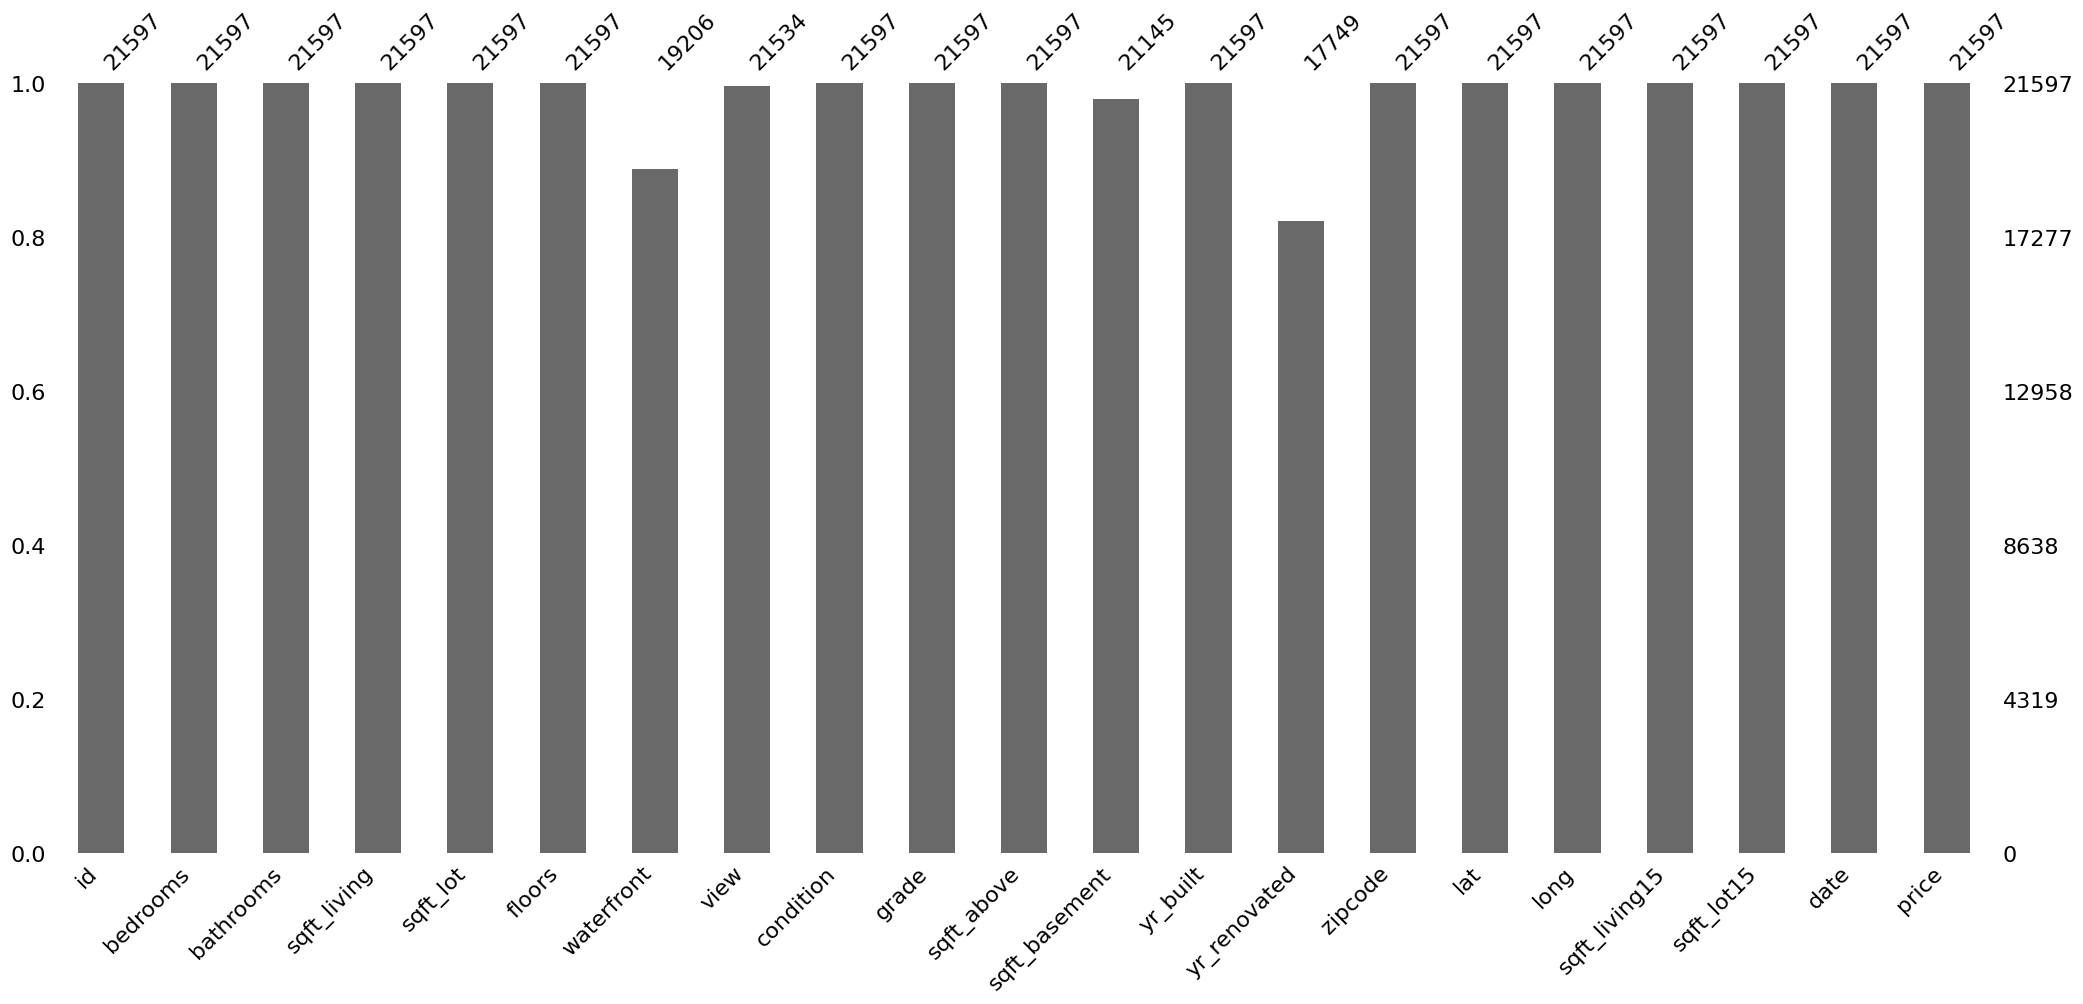

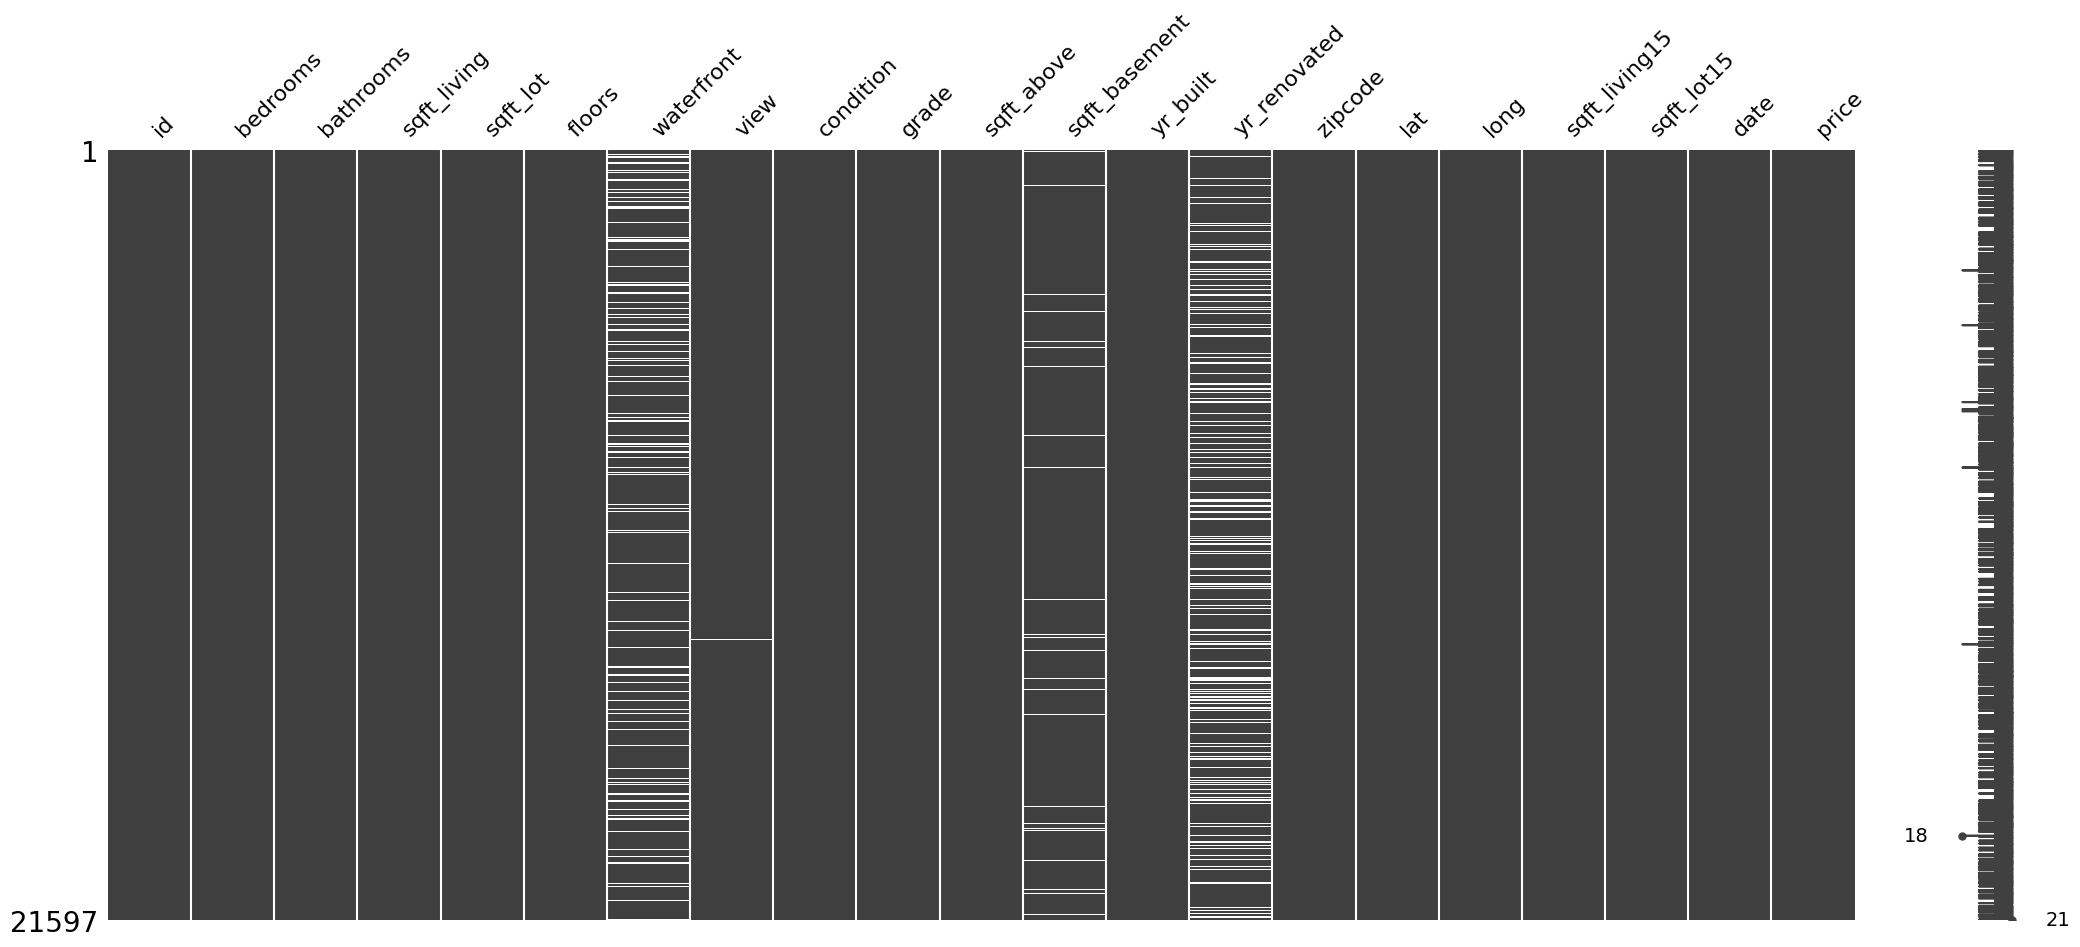

In [52]:
# Plotting to see the missing data in each column
msno.bar(df_import)

# Plotting to see how the missing data in each column is distributed
msno.matrix(df_import)

In [53]:
# Using the Fillna method to fill the missing data in the respective columns
df_import = df_import.fillna({'waterfront': 0, 'view': 0, 'sqft_basement': 0, 'yr_renovated': 0})

# Verify if the missing data in the respective columns has been filled 
print(df_import.isna().sum())

id               0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
date             0
price            0
dtype: int64


In [54]:
# Plotting the geographical data of all the houses

fig = px.scatter_map(
    df_import, 
    lat='lat', 
    lon='long', 
    hover_name='id', 
    hover_data=['zipcode','bedrooms', 'sqft_living','price'],
    zoom=7.3,
    map_style="open-street-map"
)

fig.show()

# Jacob Phillips

The client I have chosen for this TASK is Jacob Phillips. 

## Requirements:

He has the following requirements:

1. 4+ Bathrooms
2. Big lot area 
    a. Tennis court
    b. Pool
    c. Golf
3. Historic house
4. No water front
5. No Budget Restrictions


/var/folders/xb/m05hsg413ms7q3z1ggy41mh00000gn/T/ipykernel_3596/1640496555.py:26: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



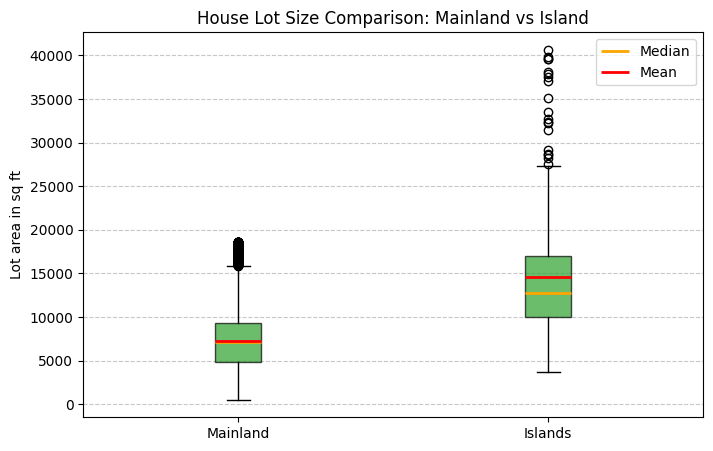

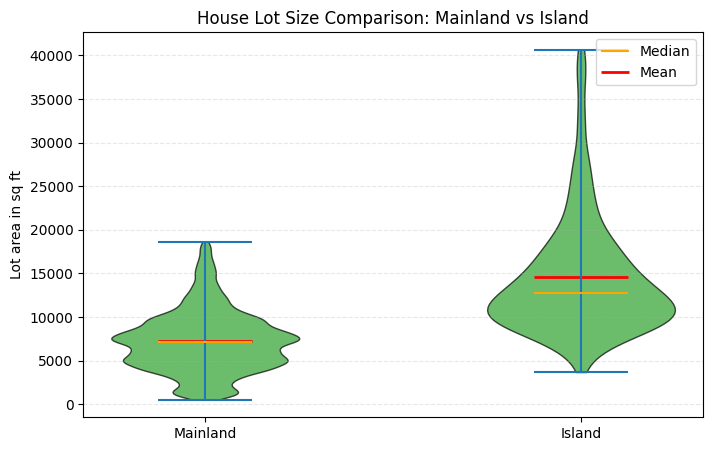

In [29]:

# Hypothesis 1: Houses on the Islands have larger lot spaces than houses on the Mainland 

df_island = df_import.query('zipcode in [98040, 98070]')['sqft_lot']
df_mainland= df_import.query('zipcode not in [98040, 98070]')['sqft_lot']

# Removing the outliners
def remove_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Return data only within the bounds
    return data[(data >= lower_bound) & (data <= upper_bound)]

df_island_clean = remove_outliers(df_island)
df_mainland_clean = remove_outliers(df_mainland)



# 1. Plotting using Matplotlib: Box Plots

data_to_plot = [df_mainland_clean, df_island_clean]

fig, ax = plt.subplots(figsize=(8, 5))
box = ax.boxplot(data_to_plot, labels=['Mainland', 'Islands'], showfliers=True, showmeans=True, meanline=True, patch_artist=True, \
                 medianprops=dict(color='orange', linewidth=2),meanprops=dict(color='red', linewidth=2,linestyle='-' ))

ax.set_title('House Lot Size Comparison: Mainland vs Island')
ax.set_ylabel('Lot area in sq ft')

for patch in box['boxes']:
    patch.set_facecolor('#2ca02c')
    patch.set_edgecolor('black')
    patch.set_alpha(0.7)

ax.legend(
    [box['medians'][0], box['means'][0]],
    ['Median', 'Mean'],
    loc='upper right'
)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



# 2. Plotting using Matplotlib - Violin Plots

fig, ax = plt.subplots(figsize=(8, 5))
parts = ax.violinplot(data_to_plot, showmeans=True, showmedians=True)

for pc in parts['bodies']:
    pc.set_facecolor('#2ca02c') 
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

ax.set_title('House Lot Size Comparison: Mainland vs Island')
ax.set_xticks([1, 2])
ax.set_xticklabels(['Mainland', 'Island'])

median_handle = parts.get('cmedians', parts['cbars'])  
mean_handle = parts['cmeans']  

if 'cmedians' in parts:
    parts['cmedians'].set_color('orange')
    parts['cmedians'].set_linewidth(1.5)

if 'cmeans' in parts:
    parts['cmeans'].set_color('red')
    parts['cmeans'].set_linewidth(2)                        
ax.legend([median_handle, mean_handle], ['Median', 'Mean'], loc='upper right')

ax.set_ylabel('Lot area in sq ft')

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()


/var/folders/xb/m05hsg413ms7q3z1ggy41mh00000gn/T/ipykernel_3596/2375248759.py:27: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



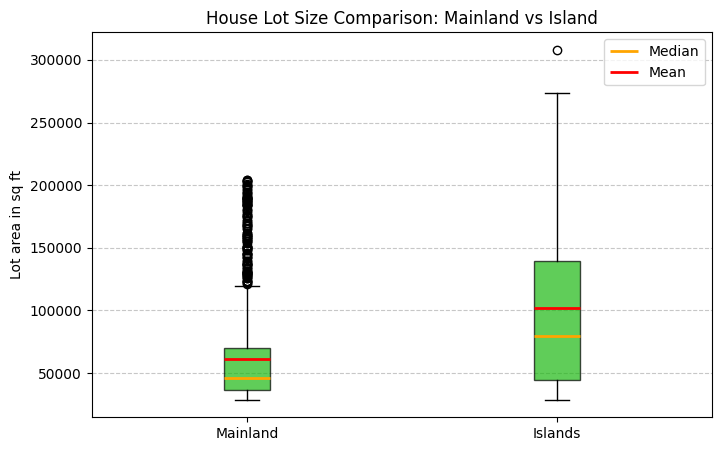

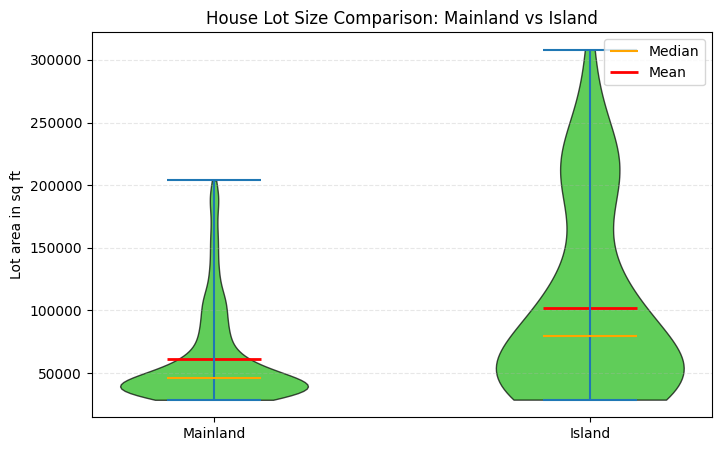

In [30]:
#Hypothesis 1: Houses on the Islands have larger lot spaces than houses on the Mainland
# Here the minimum lot size is now incresed to 28600 sqft

df_island_increased = df_import.query('zipcode in [98040, 98070] and sqft_lot >= 28600')['sqft_lot']
df_mainland_increased = df_import.query('zipcode not in [98040, 98070] and sqft_lot >= 28600')['sqft_lot']

# Removing the outliners

def remove_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Return data only within the bounds
    return data[(data >= lower_bound) & (data <= upper_bound)]

df_island_clean_increased = remove_outliers(df_island_increased)
df_mainland_clean_increased = remove_outliers(df_mainland_increased)

data_to_plot = [df_mainland_clean_increased, df_island_clean_increased]

# 1. Plotting using Matplotlib: Box Plots


fig, ax = plt.subplots(figsize=(8, 5))
box = ax.boxplot(data_to_plot, labels=['Mainland', 'Islands'], showfliers=True, showmeans=True, meanline=True, patch_artist=True, \
                 medianprops=dict(color='orange', linewidth=2),meanprops=dict(color='red', linewidth=2,linestyle='-' ))

ax.set_title('House Lot Size Comparison: Mainland vs Island')
ax.set_ylabel('Lot area in sq ft')

for patch in box['boxes']:
    patch.set_facecolor("#1db812") 
    patch.set_edgecolor('black')
    patch.set_alpha(0.7)

ax.legend(
    [box['medians'][0], box['means'][0]],
    ['Median', 'Mean'],
    loc='upper right'
)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# 2. Plotting using Matplotlib - Violin Plots

fig, ax = plt.subplots(figsize=(8, 5))
parts = ax.violinplot(data_to_plot, showmeans=True, showmedians=True)

for pc in parts['bodies']:
    pc.set_facecolor("#1db812") 
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

ax.set_title('House Lot Size Comparison: Mainland vs Island')
ax.set_xticks([1, 2])
ax.set_xticklabels(['Mainland', 'Island'])
ax.set_ylabel('Lot area in sq ft')

median_handle = parts.get('cmedians', parts['cbars'])  
mean_handle = parts['cmeans']  

if 'cmedians' in parts:
    parts['cmedians'].set_color('orange')
    parts['cmedians'].set_linewidth(1.5)

if 'cmeans' in parts:
    parts['cmeans'].set_color('red')
    parts['cmeans'].set_linewidth(2)                        
ax.legend([median_handle, mean_handle], ['Median', 'Mean'], loc='upper right')

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

/var/folders/xb/m05hsg413ms7q3z1ggy41mh00000gn/T/ipykernel_3596/479966217.py:24: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



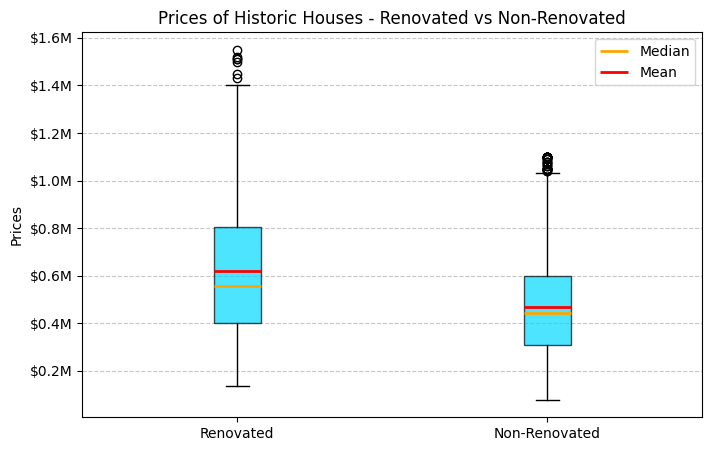

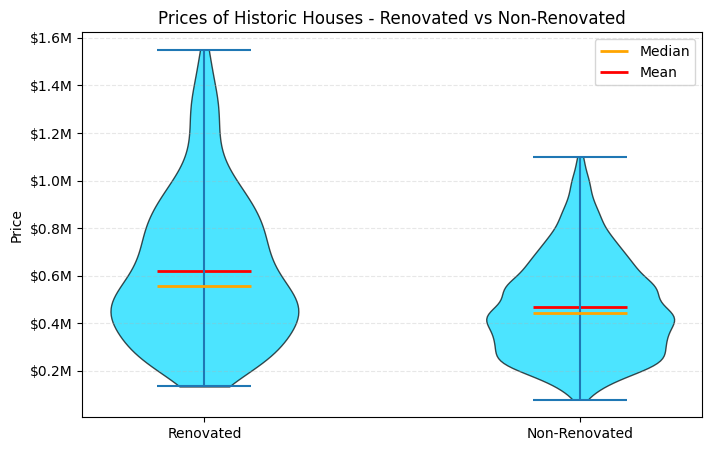

In [31]:
# Hypothesis 2: Renovated historic houses are more expensive than non-renovated historic houses

df_historic_rn = df_import.query('yr_built <= 1950 and yr_renovated !=0')['price']
df_historic_nrn= df_import.query('yr_built <= 1950 and yr_renovated ==0')['price']

# Removing the outliners
def remove_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Return data only within the bounds
    return data[(data >= lower_bound) & (data <= upper_bound)]

df_historic_rn_clean = remove_outliers(df_historic_rn)
df_historic_nrn_clean = remove_outliers(df_historic_nrn)

data_to_plot = [df_historic_rn_clean, df_historic_nrn_clean]

# 1. Plotting using Matplotlib - Box Plots

fig, ax = plt.subplots(figsize=(8, 5))
box = ax.boxplot(data_to_plot, labels=['Renovated','Non-Renovated'], showfliers=True, showmeans=True, meanline=True, patch_artist=True, \
                 medianprops=dict(color='orange', linewidth=2),meanprops=dict(color='red', linewidth=2,linestyle='-' ))

ax.set_title('Prices of Historic Houses - Renovated vs Non-Renovated')
ax.set_ylabel('Prices')
ax.grid(axis='y', linestyle='--', alpha=0.7)

for patch in box['boxes']:
    patch.set_facecolor("#00d9ff")
    patch.set_edgecolor('black')
    patch.set_alpha(0.7)

ax.legend(
    [box['medians'][0], box['means'][0]],
    ['Median', 'Mean'],
    loc='upper right'
)

plt.gca().yaxis.set_major_formatter(lambda x, pos: f'${x*1e-6:.1f}M')
plt.show()


# 2. Plotting using Matplotlib - Violin Plots

fig, ax = plt.subplots(figsize=(8, 5))
parts = ax.violinplot(data_to_plot, showmeans=True, showmedians=True)

for pc in parts['bodies']:
    pc.set_facecolor("#00d9ff")
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

ax.yaxis.set_major_formatter(lambda x, pos: f'${x*1e-6:.1f}M')

ax.set_title('Prices of Historic Houses - Renovated vs Non-Renovated')
ax.set_xticks([1, 2])
ax.set_xticklabels(['Renovated', 'Non-Renovated'])
ax.set_ylabel('Price')

median_handle = parts.get('cmedians', parts['cbars'])  
mean_handle = parts['cmeans']  

if 'cmedians' in parts:
    parts['cmedians'].set_color('orange')
    parts['cmedians'].set_linewidth(2)

if 'cmeans' in parts:
    parts['cmeans'].set_color('red')
    parts['cmeans'].set_linewidth(2)         

ax.legend([median_handle, mean_handle], ['Median', 'Mean'], loc='upper right')

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()


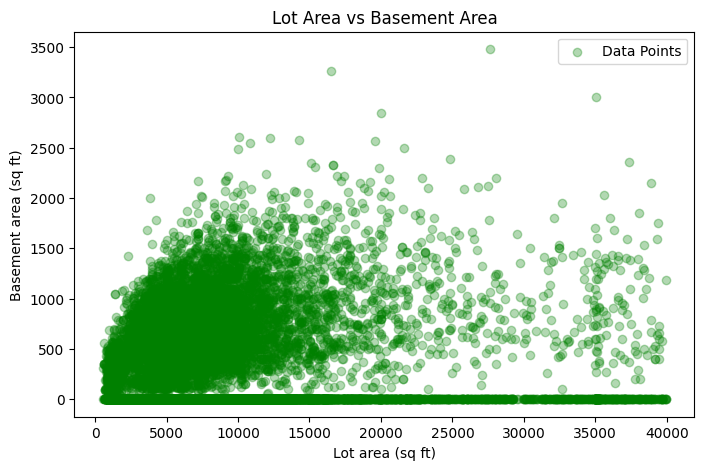

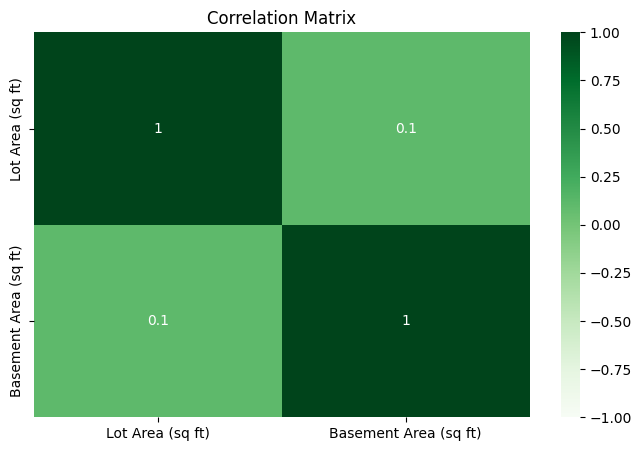

In [32]:
# Hypothesis 3: Houses with larger lot area in sqft have smaller basement area in sqft 

df_import_hypo3 = df_import.query('sqft_lot < 40000 and sqft_basement < 3500')

#corr_val = df_import_hypo3['sqft_lot'].corr(df_import_hypo3['sqft_basement'])
plt.figure(figsize = (8,5))
plt.scatter(df_import_hypo3['sqft_lot'], df_import_hypo3['sqft_basement'], alpha=0.3, label='Data Points', color='green')

#plt.title(f'Lot Area vs Basement Area (r = {corr_val:.2f})')
plt.title('Lot Area vs Basement Area')
plt.xlabel('Lot area (sq ft)')
plt.ylabel('Basement area (sq ft)')
plt.legend()
plt.show()

# Showing the heat map to verify the corelation

corr = (
    df_import_hypo3[['sqft_lot','sqft_basement']]
    .rename(columns={
        'sqft_lot': 'Lot Area (sq ft)',
        'sqft_basement': 'Basement Area (sq ft)'
    })
    .corr()
)

fig, ax = plt.subplots(figsize = (8,5))
sns.heatmap(corr, annot=True, cmap='Greens', vmin=-1, vmax=1, ax=ax)
ax.set_title('Correlation Matrix')
plt.show()

In [33]:
# Cleaning the data to fit my client: Jacob Phillips

df_jacob = df_import.query('waterfront == 0 and yr_built <= 1950 and bathrooms >= 4 and sqft_lot >= 28600 and grade >= 11')

df_jacob.sort_values(['price'], ascending=False)

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
5961   5249800010     4.000      4.250     6410.000 43838.000   2.500   
3018   3377900195     4.000      5.500     6930.000 45100.000   1.000   
14172  1333300145     3.000      4.000     4200.000 30120.000   2.000   
15152  3304700130     4.000      4.000     3860.000 67953.000   2.000   

       waterfront  view  condition  grade  ...  sqft_basement  yr_built  \
5961        0.000 2.000          4     12  ...        800.000      1906   
3018        0.000 0.000          4     11  ...          0.000      1950   
14172       0.000 2.000          4     11  ...        600.000      1933   
15152       0.000 2.000          4     12  ...          0.000      1927   

       yr_renovated  zipcode    lat     long  sqft_living15  sqft_lot15  \
5961          0.000    98144 47.570 -122.280       2270.000    6630.000   
3018       1991.000    98006 47.555 -122.144       2560.000   37766.000   
14172         0.000    98112 47.638 -122.311       2760.000   12200.000   
15152         0.000    98177 47.747 -122.378       4410.000  128066.000   

            date       price  
5961  2014-12-03 2730000.000  
3018  2014-09-29 2530000.000  
14172 2015-03-04 2230000.000  
15152 2015-01-28 1760000.000  

[4 rows x 21 columns]

In [34]:
# Plotting the geographical data of all the houses selected for Jacob

fig = px.scatter_map(
    df_jacob, 
    lat='lat', 
    lon='long', 
    hover_name='id', 
    hover_data=['zipcode','bathrooms', 'sqft_living','price','sqft_lot','yr_built','yr_renovated'],
    zoom=8.5,
    map_style="open-street-map"
)
fig.update_traces(marker=dict(color="red", size=15))
fig.show()

In [35]:
# Plotting both the scatter plots in 1 plot
df_all = df_import.copy()
df_all["group"] = "All Properties"

df_pick = df_jacob.copy()
df_pick["group"] = "Jacob Picks"

df_all["size"] = 2
df_pick["size"] = 16

# Combine
df_plot = pd.concat([df_all, df_pick], ignore_index=True)


fig = px.scatter_map(
    df_plot,
    lat="lat",
    lon="long",
    color="group",
    size="size",
    size_max=18,
    hover_name="id",
    hover_data=["zipcode", "bedrooms", "bathrooms", "sqft_living", "price",
                "sqft_lot", "yr_built", "yr_renovated"],
    color_discrete_map={
        "All Properties": "blue",
        "Jacob Picks": "red"
    },
    zoom=7.5,
    map_style="open-street-map"
)

fig.show()


In [36]:
# Printing out the final recommendation for Jacob in CSV foramt

df_jacob.to_csv('data/Recommendation_for_Jacob.csv', index=False)